In [5]:
import pandas as pd
import dask.dataframe as dd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print ("Setup Complete")

Setup Complete


In [3]:
filepath = "dataset/covid_case.csv"
data = pd.read_csv(filepath,index_col="date",parse_dates=True)

/tmp/ipykernel_4663/2994907317.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filepath,index_col="date",parse_dates=True)


In [7]:
data.head()

,county,state,fips,Lat,Lon,cases,deaths,people_tested,state_cases,state_deaths,new_cases,new_deaths,new_state_cases,new_state_deaths
date,,,,,,,,,,,,,,
2021-08-27,Los Angeles,California,6037,34.308284,-118.228241,"1,407,317","25,284",NaN,"4,360,789","65,873","1,930",21,"14,660",59
2021-08-28,Los Angeles,California,6037,34.308284,-118.228241,"1,407,317","25,284",NaN,"4,360,789","65,873",0,0,0,0
2021-08-30,Los Angeles,California,6037,34.308284,-118.228241,"1,414,854","25,401",NaN,"4,405,324","66,301","2,475",35,"10,613",119
2021-08-31,Los Angeles,California,6037,34.308284,-118.228241,"1,414,854","25,401",NaN,"4,405,324","66,301",0,0,0,0
2021-09-01,Los Angeles,California,6037,34.308284,-118.228241,"1,419,030","25,454",NaN,"4,418,368","66,470","2,111",20,"6,798",87


In [4]:
data.tail()

,county,state,fips,Lat,Lon,cases,deaths,people_tested,state_cases,state_deaths,new_cases,new_deaths,new_state_cases,new_state_deaths
date,,,,,,,,,,,,,,
2023-03-02,Los Angeles,California,6037,34.308284,-118.228241,"3,705,381","35,453",NaN,"12,110,179","100,954",0,0,0,0
2023-03-03,Los Angeles,California,6037,34.308284,-118.228241,"3,705,381","35,453",NaN,"12,120,965","100,954",0,0,"10,786",0
2023-03-04,Los Angeles,California,6037,34.308284,-118.228241,"3,705,381","35,453",NaN,"12,120,965","100,954",0,0,0,0
2023-03-05,Los Angeles,California,6037,34.308284,-118.228241,"3,710,586","35,545",NaN,"12,129,699","101,159","5,205",92,"8,734",205
2023-03-06,Los Angeles,California,6037,34.308284,-118.228241,"3,710,586","35,545",NaN,"12,129,699","101,159",0,0,0,0


<Axes: title={'center': 'LD USA COVID cases 2022-2023 Date wise'}, xlabel='date'>

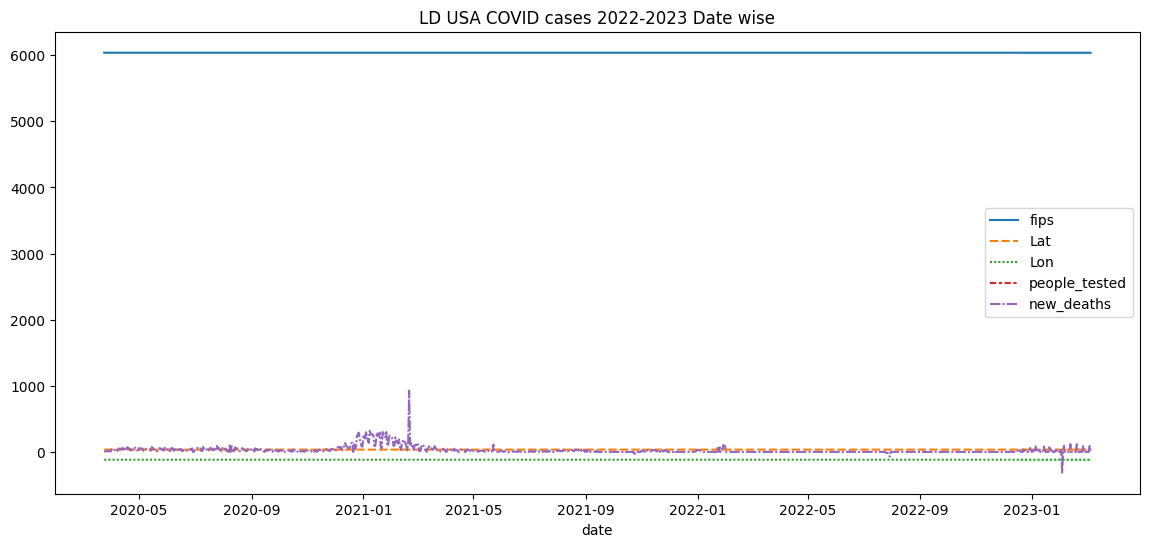

In [5]:
# sns.lineplot(data=data)
plt.figure(figsize=(14,6))
plt.title("LD USA COVID cases 2022-2023 Date wise")
sns.lineplot(data=data)

In [6]:
list(data.columns)

['county',
 'state',
 'fips',
 'Lat',
 'Lon',
 'cases',
 'deaths',
 'people_tested',
 'state_cases',
 'state_deaths',
 'new_cases',
 'new_deaths',
 'new_state_cases',
 'new_state_deaths']

Text(0.5, 0, 'date')

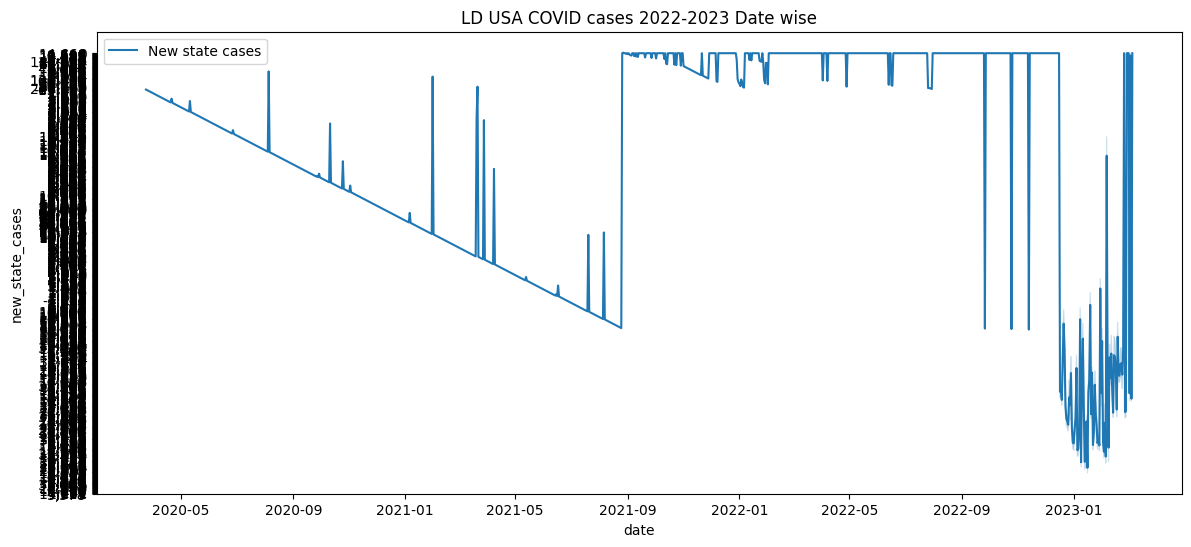

In [7]:
plt.figure(figsize=(14,6))
plt.title("LD USA COVID cases 2022-2023 Date wise")
# plt figure showing as new_state_cases
sns.lineplot(data=data['new_state_cases'],label="New state cases")
plt.xlabel('date')

#  Bar Charts and Heatmaps

In [8]:
flight = 'dataset/flight_delays.csv'
fldata = pd.read_csv(flight,index_col="Month")
fldata

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


Text(0, 0.5, 'Arrival delay (In minutes)')

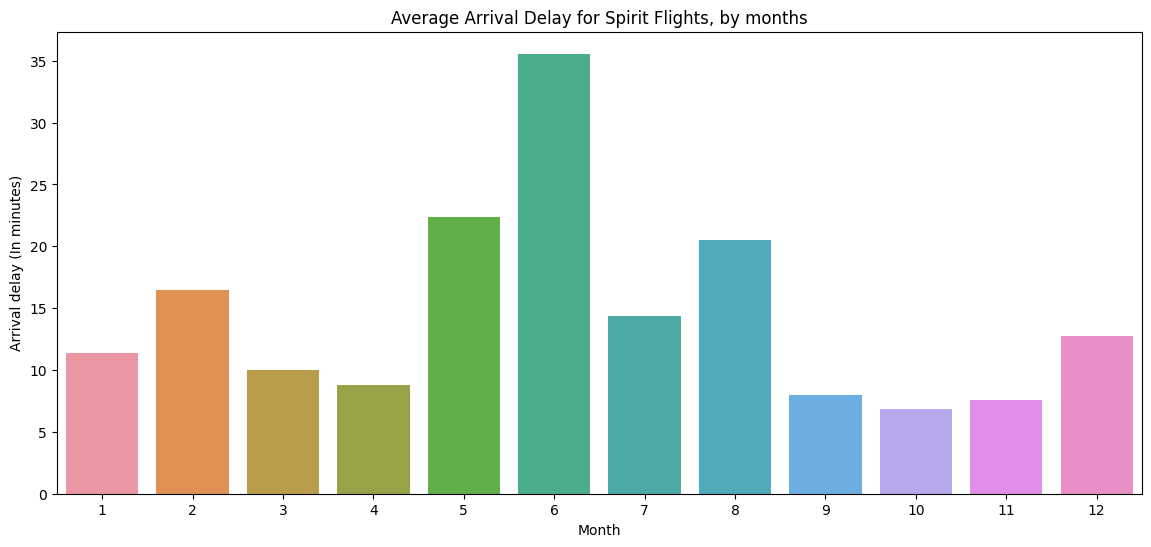

In [9]:
plt.figure(figsize=(14,6))
plt.title("Average Arrival Delay for Spirit Flights, by months")
sns.barplot(x=fldata.index, y=fldata['NK'])
plt.ylabel("Arrival delay (In minutes)")

Text(0.5, 47.7222222222222, 'Airline')

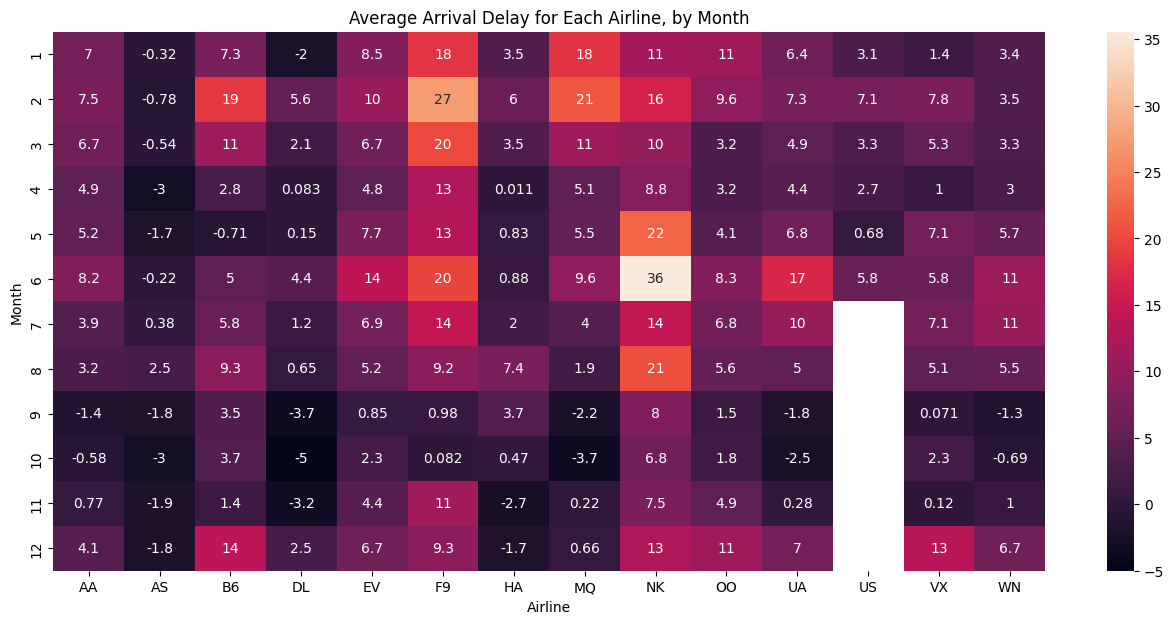

In [10]:
plt.figure(figsize=(16,7))
plt.title("Average Arrival Delay for Each Airline, by Month")
sns.heatmap(data=fldata, annot=True)
plt.xlabel("Airline")

# Bar charts and heattmaps excersice

### IGN Data validation

In [11]:
ign_filepath = 'dataset/ign_scores.csv'
ign_data = pd.read_csv(ign_filepath,index_col="Platform")
ign_data.head()
ign_data.tail()
print(ign_data)

                        Action  Action, Adventure  Adventure  Fighting  \
Platform                                                                 
Dreamcast             6.882857           7.511111   6.281818  8.200000   
Game Boy Advance      6.373077           7.507692   6.057143  6.226316   
Game Boy Color        6.272727           8.166667   5.307692  4.500000   
GameCube              6.532584           7.608333   6.753846  7.422222   
Nintendo 3DS          6.670833           7.481818   7.414286  6.614286   
Nintendo 64           6.649057           8.250000   7.000000  5.681250   
Nintendo DS           5.903608           7.240000   6.259804  6.320000   
Nintendo DSi          6.827027           8.500000   6.090909  7.500000   
PC                    6.805791           7.334746   7.136798  7.166667   
PlayStation           6.016406           7.933333   6.313725  6.553731   
PlayStation 2         6.467361           7.250000   6.315152  7.306349   
PlayStation 3         6.853819        

Text(0.5, 1.0, 'Average Score for Racing Games, by Platform')

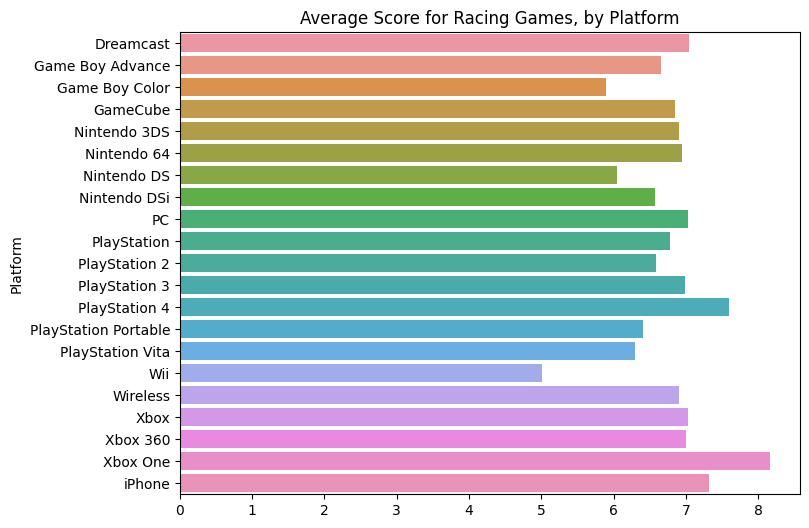

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(8, 6))
# Bar chart showing average score for racing games by platform
sns.barplot(x=ign_data['Racing'], y=ign_data.index)
# Add label for horizontal axis
plt.xlabel("")
# Add label for vertical axis
plt.title("Average Score for Racing Games, by Platform")

Text(0.5, 47.7222222222222, 'Games')

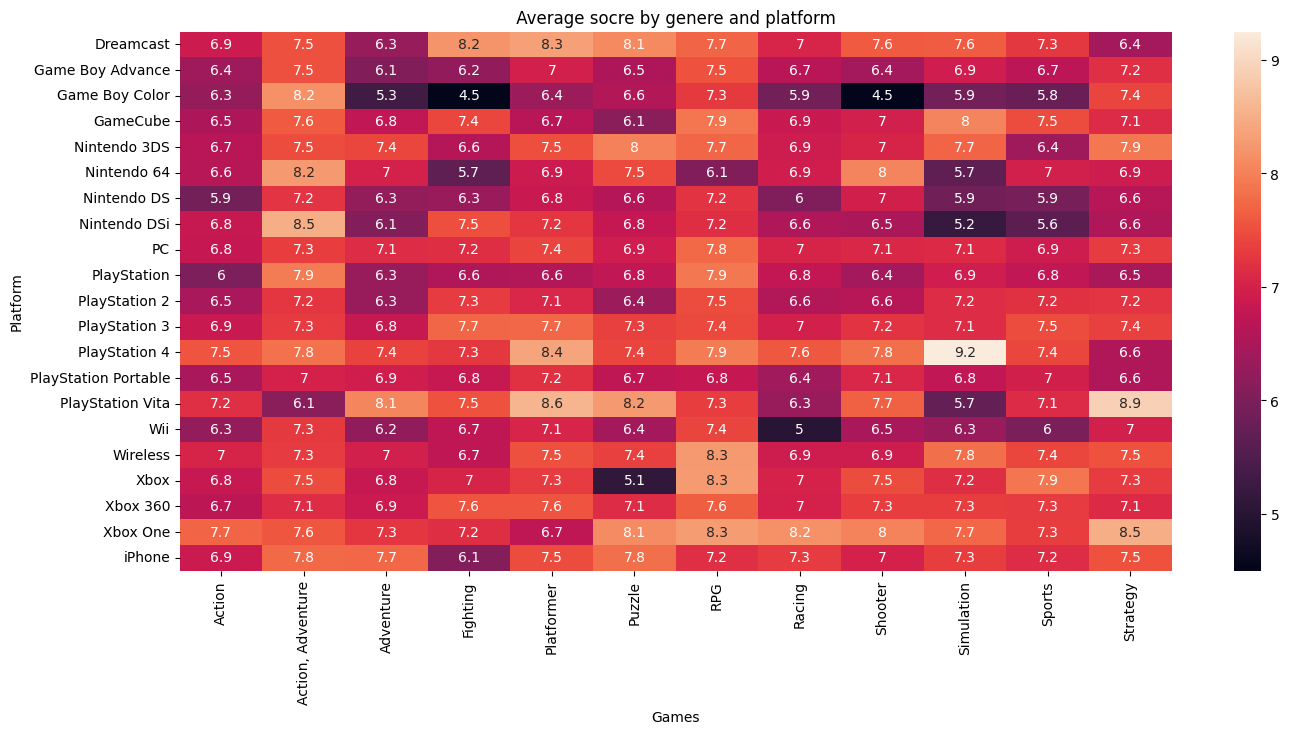

In [14]:
# Heatmap showing average game score by platform and genre
plt.figure(figsize=(16,7)) # Your code here
plt.title(" Average socre by genere and platform ")
sns.heatmap(data=ign_data, annot=True)
plt.xlabel("Games")

# Scatter Plots

In [15]:
ifp = 'dataset/insurance.csv'
idata = pd.read_csv(ifp)
idata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

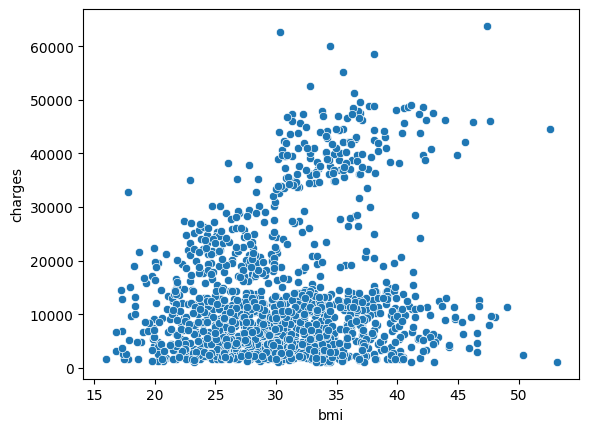

In [16]:
sns.scatterplot(x=idata['bmi'], y=idata['charges'])



### The scatterplot above suggests that body mass index (BMI) and insurance charges are positively correlated, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

### To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.


<Axes: xlabel='bmi', ylabel='charges'>

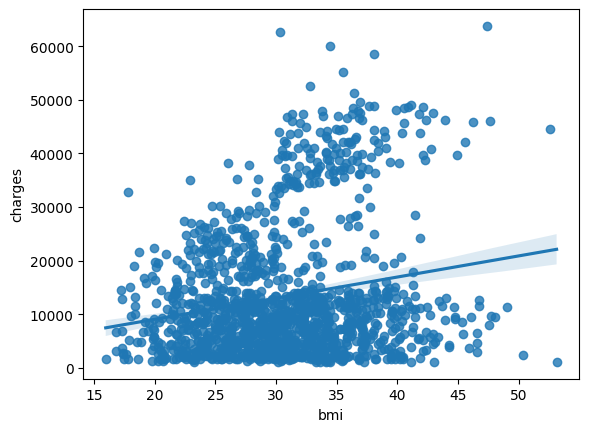

In [18]:
sns.regplot(x=idata['bmi'], y=idata['charges'])


### Color-coded scatter plots

#### We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

#### For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.


<Axes: xlabel='bmi', ylabel='charges'>

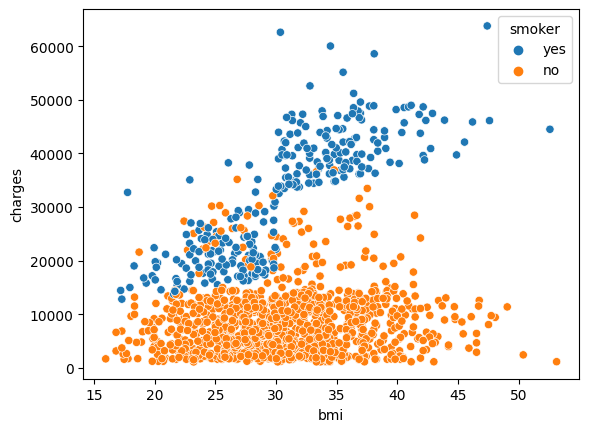

In [19]:
sns.scatterplot(x=idata['bmi'], y=idata['charges'], hue=idata['smoker'])



This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. (You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)


/home/rajrup/projects/machine_learning/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/rajrup/projects/machine_learning/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


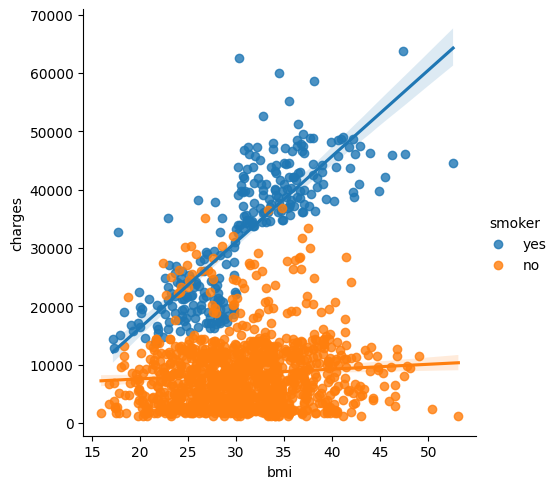

In [21]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=idata)



The sns.lmplot command above works slightly differently than the commands you have learned about so far:

    Instead of setting x=insurance_data['bmi'] to select the 'bmi' column in insurance_data, we set x="bmi" to specify the name of the column only.
    Similarly, y="charges" and hue="smoker" also contain the names of columns.
    We specify the dataset with data=insurance_data.

Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the sns.swarmplot command.


/home/rajrup/projects/machine_learning/env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/home/rajrup/projects/machine_learning/env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rajrup/projects/machine_learning/env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rajrup/projects/machine_learning/env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


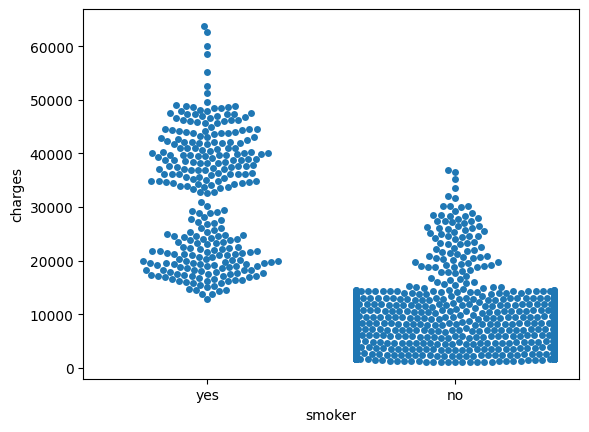

In [27]:
sns.swarmplot(x=idata['smoker'],
              y=idata['charges'])

# Create Distributions and Histograms and Density plots

####  We'll work with a dataset of 150 different flowers, or 50 each from three different species of iris (Iris setosa, Iris versicolor, and Iris virginica).

In [4]:
irfp = 'dataset/iris.csv'
ird = pd.read_csv(irfp,index_col='Id')
ird.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Histograms

#### Say we would like to create a histogram to see how petal length varies in iris flowers. We can do this with the sns.histplot command.

<Axes: xlabel='Petal Length (cm)', ylabel='Count'>

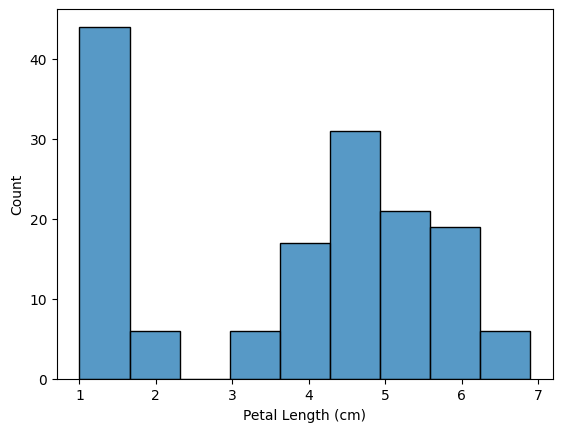

In [5]:
# Histogram
sns.histplot(ird['Petal Length (cm)'])

#### In the code cell above, we had to supply the command with the column we'd like to plot (in this case, we chose 'Petal Length (cm)'

## Density plots

#### The next type of plot is a kernel density estimate (KDE) plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

#### To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curve (and data= chooses the column we would like to plot).

<Axes: xlabel='Petal Length (cm)', ylabel='Density'>

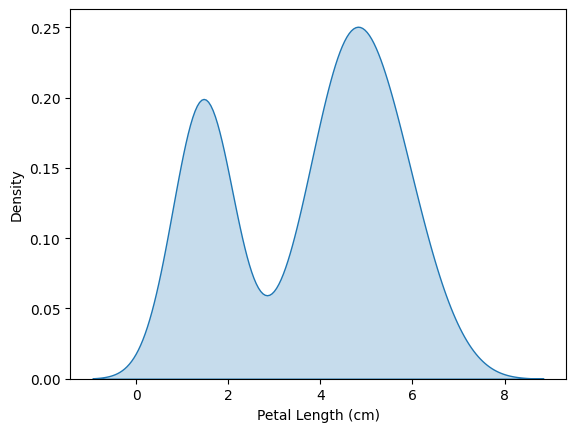

In [8]:
# kde plot
sns.kdeplot(data=ird['Petal Length (cm)'], fill=True)

## 2D KDE plots

#### We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the sns.jointplot command.

#### In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely.

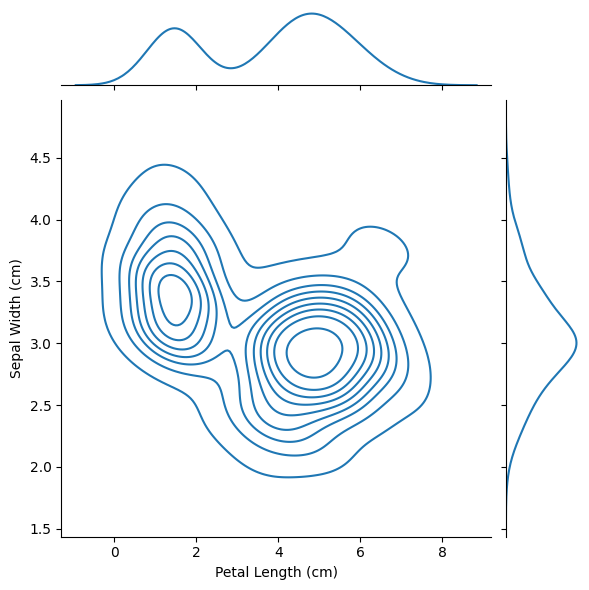

In [10]:
sns.jointplot(x=ird['Petal Length (cm)'],y=ird['Sepal Width (cm)'], kind='kde')

#### Note that in addition to the 2D KDE plot in the center,

   #### the curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, iris_data['Petal Length (cm)']), and
   #### the curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, iris_data['Sepal Width (cm)']).



## Color-coded plots

#### For the next part of the tutorial, we'll create plots to understand differences between the species.

#### We can create three different histograms (one for each species) of petal length by using the sns.histplot command (as above).

    ##### data= provides the name of the variable that we used to read in the data
    ##### x= sets the name of column with the data we want to plot
    ##### hue= sets the column we'll use to split the data into different histograms


Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

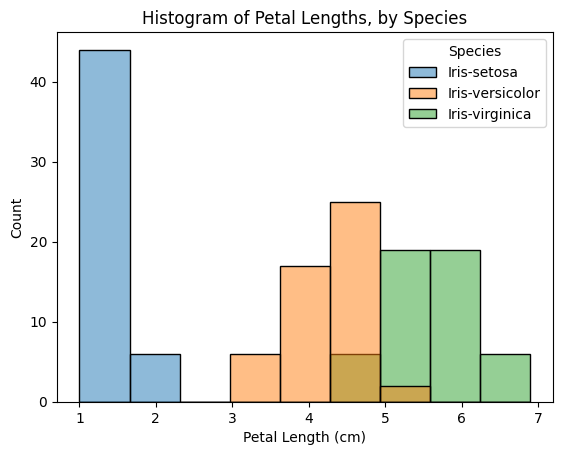

In [13]:
sns.histplot(data=ird,x='Petal Length (cm)', hue='Species')
# Add title
plt.title("Histogram of Petal Lengths, by Species")


We can also create a KDE plot for each species by using sns.kdeplot (as above). The functionality for data, x, and hue are identical to when we used sns.histplot above. Additionally, we set shade=True to color the area below each curve.

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

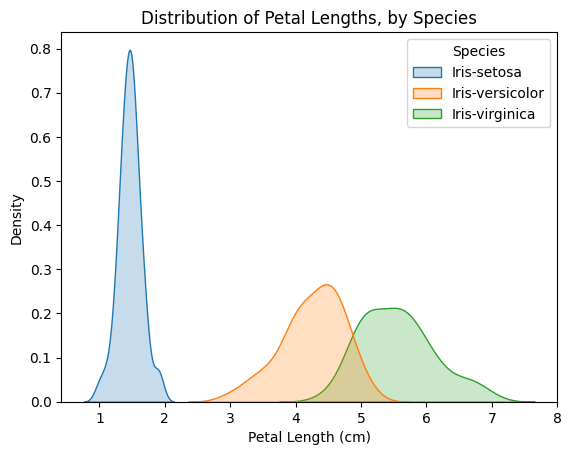

In [16]:
# KDE plots for each species
sns.kdeplot(data=ird, x='Petal Length (cm)', hue='Species', fill=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")



One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where Iris versicolor and Iris virginica seem to have similar values for petal length, while Iris setosa belongs in a category all by itself.

In fact, according to this dataset, we might even be able to classify any iris plant as Iris setosa (as opposed to Iris versicolor or Iris virginica) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be Iris setosa!


# Choosing Plot Types and Custom Styles

In this course, you've learned how to create many different chart types. Now, you'll organize your knowledge, before learning some quick commands that you can use to change the style of your charts.


Since it's not always easy to decide how to best tell the story behind your data, we've broken the chart types into three broad categories to help with this.

    Trends - A trend is defined as a pattern of change.
        sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.
    Relationship - There are many different chart types that you can use to understand relationships between variables in your data.
        sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups.
        sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.
        sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
        sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
        sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
        sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.
    Distribution - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
        sns.histplot - Histograms show the distribution of a single numerical variable.
        sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
        sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.


Changing styles with seaborn

All of the commands have provided a nice, default style to each of the plots. However, you may find it useful to customize how your plots look, and thankfully, this can be accomplished by just adding one more line bof code!

As always, we need to begin by setting up the coding environment. (This code is hidden, but you can un-hide it by clicking on the "Code" button immediately below this text, on the right.)

<Axes: xlabel='Date'>

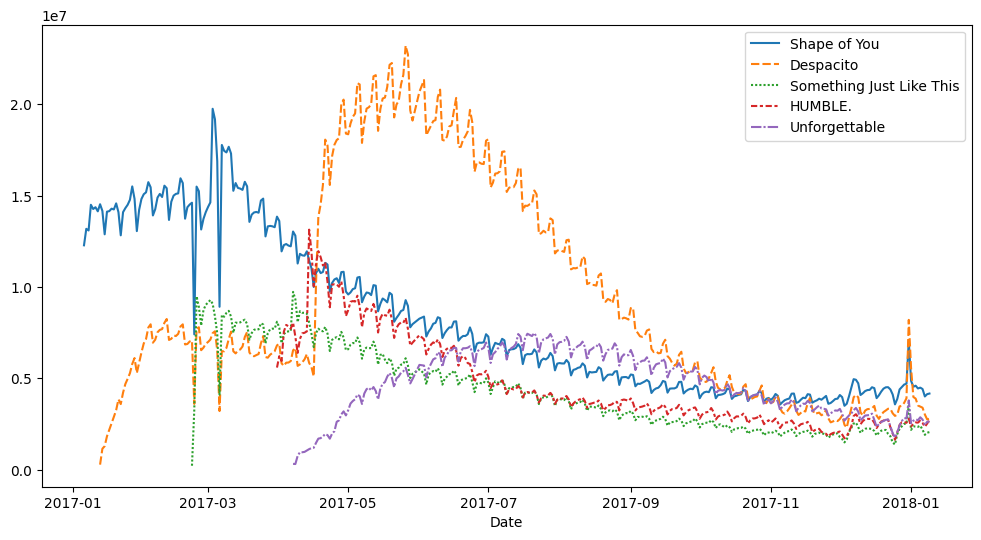

In [3]:
# Path of the file to read
spotify_filepath = "dataset/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

<Axes: xlabel='Date'>

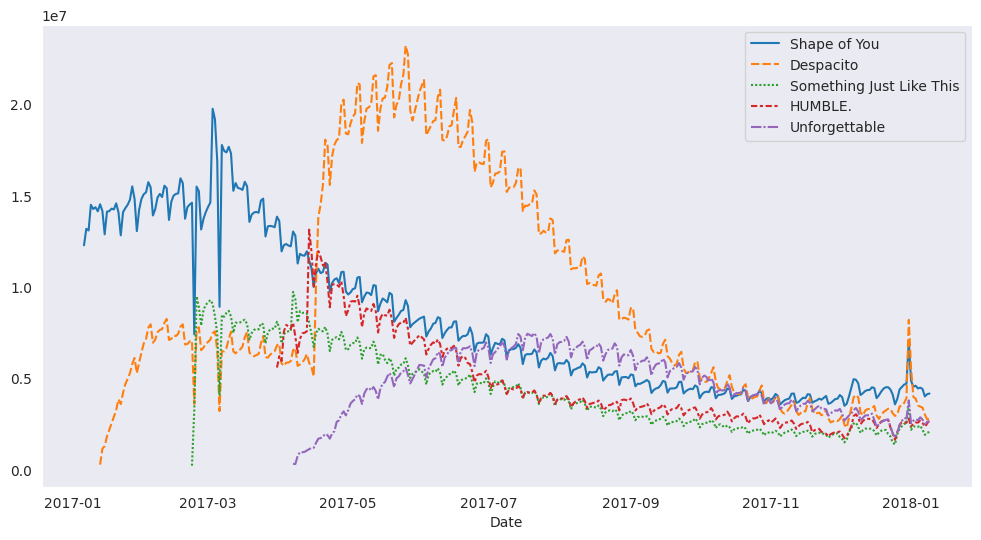

In [4]:
# Change the style of the figure to the "dark" theme
sns.set_style("dark")

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)




Seaborn has five different themes: (1)"darkgrid", (2)"whitegrid", (3)"dark", (4)"white", and (5)"ticks", and you need only use a command similar to the one in the code cell above (with the chosen theme filled in) to change it.

In the upcoming exercise, you'll experiment with these themes to see which one you like most!